In [1]:
! pip install nltk
! pip install contractions

# !pip install kaleido
# !pip install plotly>=4.0.0
# !wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
# !chmod +x /usr/local/bin/orca
# !apt-get install xvfb libgtk2.0-0 libgconf-2-4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 5.4 MB/s 
     |████████████████████████████████| 287 kB 31.7 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('wordnet')
import plotly.express as px
import contractions
import plotly.graph_objects as go
from google.colab import files

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
# reading the database
data = pd.read_csv("./drive/MyDrive/ANLP_Project/gender.csv")

In [5]:
data1 = data
gender = data1.query("topic == 'Gender'")

Bar Plot for all the groups in bias class Gender

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 22899 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 23401 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 23376 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 31181 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 26063 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 27495 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 35270 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotli

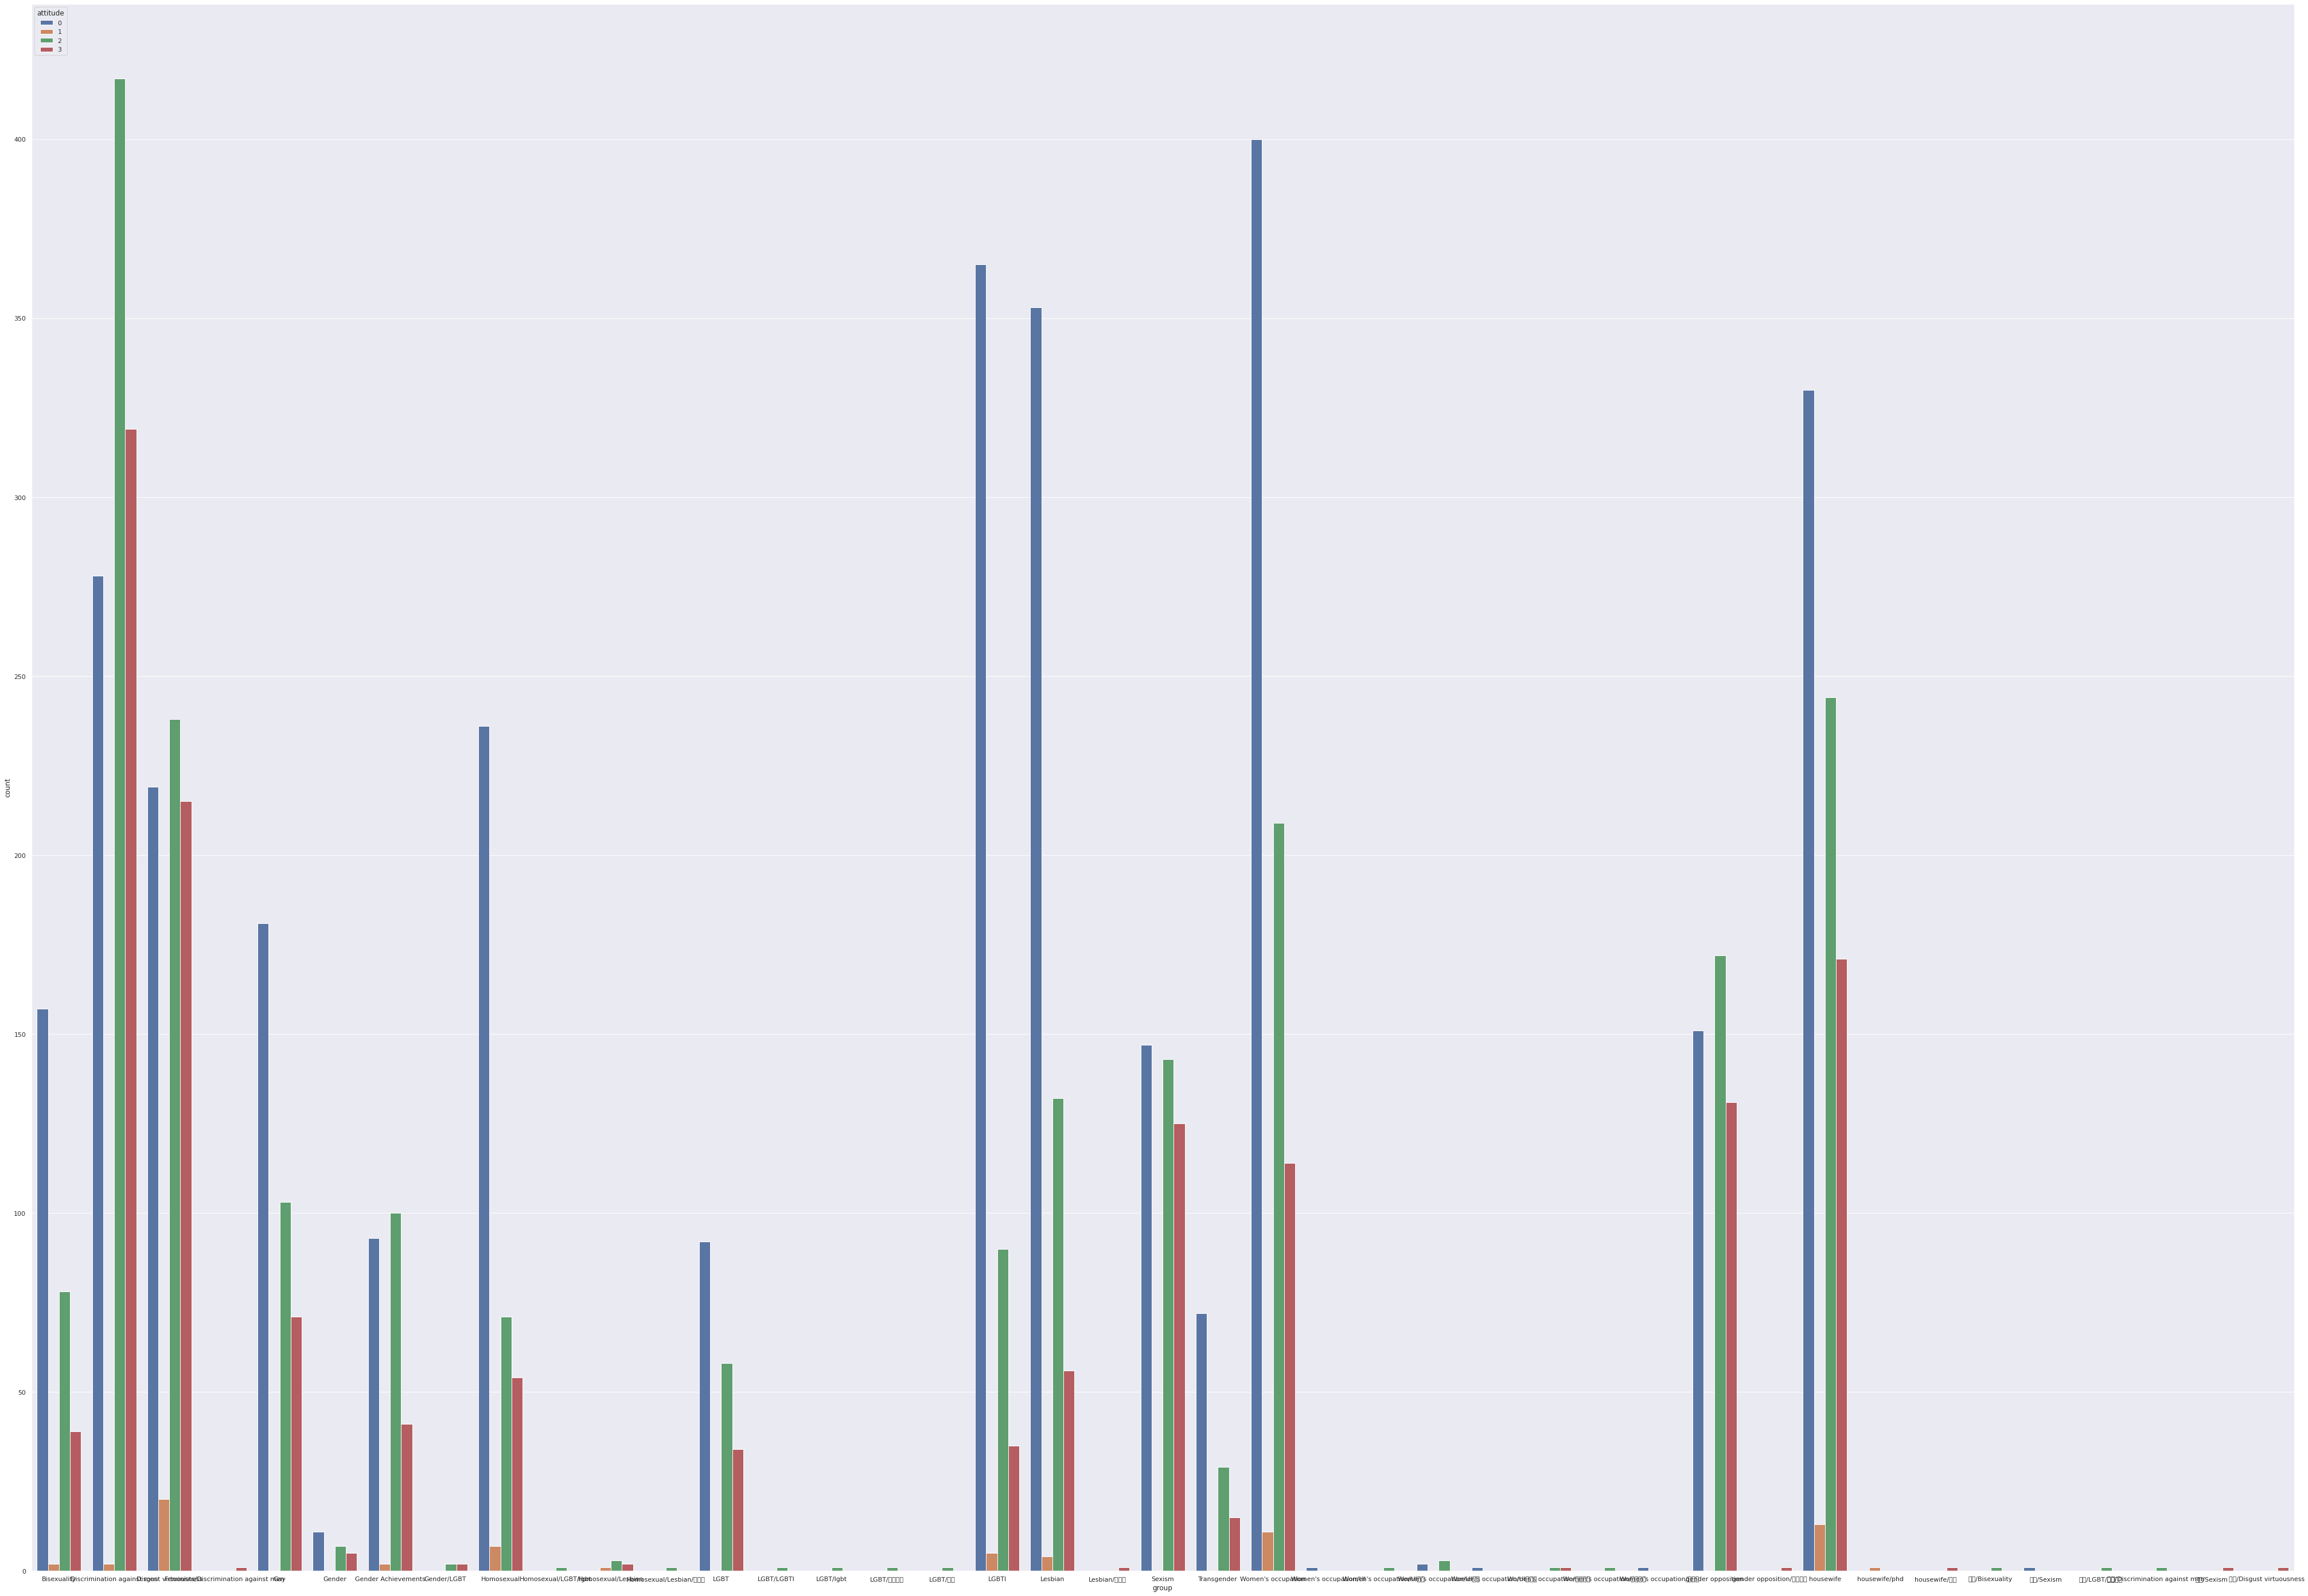

In [13]:
gender1 = gender.groupby(['group', 'attitude']).size().reset_index(name='count')

sns.barplot(x='group',y='count', data=gender1,
            hue='attitude')
sns.set(rc={'figure.figsize':(70.7,50.27)})
plt.show()

In [7]:
# Stop words

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Radar Chart depicting the 20 most frequent non stop words for group Gay

In [8]:
genderDict = {}

def count(w):
  if w not in genderDict:
    genderDict[w] = 1
  else:
    genderDict[w] += 1
  return


gender2 = gender.query("attitude == 3")
gender2 = gender.query("group == 'Gay'")
gender2["q"] = gender2["q"].str.replace('[^a-zA-Z -]', '')
gender2["q"] = gender2["q"].str.strip()
gender2["q"] = gender2["q"].apply(lambda x: [contractions.fix(word) for word in x.split()])
# Removed stop words
gender2["q"] = gender2["q"].apply(lambda x: [word for word in x if word not in (stopwords)])
gender3 = gender2["q"].apply(lambda sent: [count(w) for w in sent])
genderDict = sorted(genderDict, reverse=True)
# print(genderDict[:20])
ind = 0
li = list()
def getC(s, w, li):
  for w1 in s:
    if w in w1:
      if len(li) is ind+1:
        li[ind] += 1
      else:
        li.append(1)
  return

for w1 in genderDict[:20]:
  gender4 = gender2["q"].apply(lambda sent: getC(sent, w1, li))
  if len(li) is not ind+1:
    li.append(0)
  ind += 1

# print(len(li))
# print(li)
df = pd.DataFrame(dict(
    r=li,
    theta=genderDict[:20]))

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=li,
      theta=genderDict[:20],
      fillcolor='rgba(0, 0, 0, 0.6)',
      fill='toself',
      marker = dict(color = 'red'),
      name='Group Gay'
))
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,
    )
)
# go.Figure.write_html(fig,"Gender_a.html")
# files.download("Gender_a.html")


<ipython-input-8-97aa494a2f5b>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  gender2["q"] = gender2["q"].str.replace('[^a-zA-Z -]', '')
<ipython-input-8-97aa494a2f5b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender2["q"] = gender2["q"].str.replace('[^a-zA-Z -]', '')
<ipython-input-8-97aa494a2f5b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender2["q"] = gender2["q"].str.strip()
<ipython-input-8-97aa494a2f5b>:15: SettingWithCopyWarning: 
A

Radar Chart depicting the 20 most frequent non stop words for Group Discrimination against men

In [9]:
genderDict = {}

def count(w):
  if w not in genderDict:
    genderDict[w] = 1
  else:
    genderDict[w] += 1
  return

gender2 = gender.query("attitude == 3")
gender2 = gender.query("group == 'Discrimination against men'")
gender2["q"] = gender2["q"].str.replace('[^a-zA-Z -]', '')
gender2["q"] = gender2["q"].str.strip()
gender2["q"] = gender2["q"].apply(lambda x: [contractions.fix(word) for word in x.split()])

stopwords.append('view')
stopwords.append('tell')
stopwords.append('way')
stopwords.append('men')
stopwords.append('man')
stopwords.append('mans')
stopwords.append('women')
stopwords.append('womens')
# Removed stop words
gender2["q"] = gender2["q"].apply(lambda x: [word for word in x if word not in (stopwords)])
gender3 = gender2["q"].apply(lambda sent: [count(w) for w in sent])
genderDict = sorted(genderDict, reverse=True)
# print(genderDict[:20])
ind = 0
li = list()
def getC(s, w, li):
  for w1 in s:
    if w in w1:
      if len(li) is ind+1:
        li[ind] += 1
      else:
        li.append(1)
  return

for w1 in genderDict[:20]:
  gender4 = gender2["q"].apply(lambda sent: getC(sent, w1, li))
  if len(li) is not ind+1:
    li.append(0)
  ind += 1

# print(len(li))
# print(li)
df = pd.DataFrame(dict(
    r=li,
    theta=genderDict[:20]))

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=li,
      theta=genderDict[:20],
      fillcolor='rgba(0, 0, 255, 0.2)',
      fill='toself',
      marker = dict(color = 'blue'),
      name='Group Men'
))
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,
    )
)
# go.Figure.write_html(fig,"Gender_b.html")
# files.download("Gender_b.html")

<ipython-input-9-ac8077e11e94>:12: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-9-ac8077e11e94>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-ac8077e11e94>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-ac8077e11e94>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

Radar Chart depicting the 20 most frequent non stop words for Group LGBT

In [10]:
genderDict = {}

def count(w):
  if w not in genderDict:
    genderDict[w] = 1
  else:
    genderDict[w] += 1
  return

gender2 = gender.query("attitude == 3")
gender2 = gender.query("group == 'LGBT'")
gender2["q"] = gender2["q"].str.replace('[^a-zA-Z -]', '')
gender2["q"] = gender2["q"].str.strip()
gender2["q"] = gender2["q"].apply(lambda x: [contractions.fix(word) for word in x.split()])

# Removed stop words
gender2["q"] = gender2["q"].apply(lambda x: [word for word in x if word not in (stopwords)])
gender3 = gender2["q"].apply(lambda sent: [count(w) for w in sent])
genderDict = sorted(genderDict, reverse=True)
# print(genderDict[:20])
ind = 0
li = list()
def getC(s, w, li):
  for w1 in s:
    if w in w1:
      if len(li) is ind+1:
        li[ind] += 1
      else:
        li.append(1)
  return

for w1 in genderDict[:20]:
  gender4 = gender2["q"].apply(lambda sent: getC(sent, w1, li))
  if len(li) is not ind+1:
    li.append(0)
  ind += 1

# print(len(li))
# print(li)
df = pd.DataFrame(dict(
    r=li,
    theta=genderDict[:20]))

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=li,
      theta=genderDict[:20],
      fillcolor='rgba(0, 0, 20, 0.6)',
      fill='toself',
      marker = dict(color = 'black'),
      name='Group LGBT'
))
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,
    )
)
# go.Figure.write_html(fig,"Gender_c.html")
# files.download("Gender_c.html")

<ipython-input-10-540bb3a93b2f>:12: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-10-540bb3a93b2f>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-540bb3a93b2f>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-540bb3a93b2f>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Radar Chart depicting the 20 most frequent non stop words for Group housewife

In [11]:
genderDict = {}

def count(w):
  if w not in genderDict:
    genderDict[w] = 1
  else:
    genderDict[w] += 1
  return


gender2 = gender.query("attitude == 3")
gender2 = gender.query("group == 'housewife'")
gender2["q"] = gender2["q"].str.replace('[^a-zA-Z -]', '')
gender2["q"] = gender2["q"].str.strip()
gender2["q"] = gender2["q"].apply(lambda x: [contractions.fix(word) for word in x.split()])
# Removed stop words
gender2["q"] = gender2["q"].apply(lambda x: [word for word in x if word not in (stopwords)])
gender3 = gender2["q"].apply(lambda sent: [count(w) for w in sent])
genderDict = sorted(genderDict, reverse=True)
# print(genderDict[:20])
ind = 0
li = list()
def getC(s, w, li):
  for w1 in s:
    if w in w1:
      if len(li) is ind+1:
        li[ind] += 1
      else:
        li.append(1)
  return

for w1 in genderDict[:20]:
  gender4 = gender2["q"].apply(lambda sent: getC(sent, w1, li))
  if len(li) is not ind+1:
    li.append(0)
  ind += 1

# print(len(li))
# print(li)
df = pd.DataFrame(dict(
    r=li,
    theta=genderDict[:20]))

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=li,
      theta=genderDict[:20],
      fillcolor='rgba(0, 0, 144, 0.6)',
      fill='toself',
      marker = dict(color = 'green'),
      name='Group Housewife'
))
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,
    )
)
# go.Figure.write_html(fig,"Gender_d.html")
# files.download("Gender_d.html")


<ipython-input-11-f1293b567f65>:13: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-11-f1293b567f65>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-f1293b567f65>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-f1293b567f65>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen